In [20]:
from IPython.display import display
import ipywidgets as widgets
import pandas as pd
import seaborn as sns
import csv
from datetime import datetime
import matplotlib.pyplot as plt
import plotly.graph_objs as go

In [21]:
""" cc_data = pd.read_csv("MC2/cc_data.csv", encoding="latin1")
print("Credit card data loaded successfully.")

loyalty_data = pd.read_csv("MC2/loyalty_data.csv", encoding="latin1")
print("Loyalty card data loaded successfully.") """

' cc_data = pd.read_csv("MC2/cc_data.csv", encoding="latin1")\nprint("Credit card data loaded successfully.")\n\nloyalty_data = pd.read_csv("MC2/loyalty_data.csv", encoding="latin1")\nprint("Loyalty card data loaded successfully.") '

In [22]:
#to prosses the data
""" # Funktion för att läsa in data från en CSV-fil
def read_csv(file):
    data = []
    with open(file, 'r', newline='', encoding='latin1') as csvfile:  
        reader = csv.DictReader(csvfile)
        for row in reader:
            data.append(row)
    return data


# Funktion för att skriva data till en CSV-fil
def write_csv(data, file):
    with open(file, 'w', newline='') as csvfile:
        fieldnames = data[0].keys()
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        writer.writeheader()
        for row in data:
            writer.writerow(row)


cc_data = read_csv("MC2/cc_data.csv")
print("Credit card data loaded successfully.")

loyalty_data = read_csv("MC2/loyalty_data.csv")
print("Loyalty card data loaded successfully.")

# Skapa en lista för att lagra resultaten
result = []

for cc_row in cc_data:
    cc_timestamp = datetime.strptime(cc_row['timestamp'], '%m/%d/%Y %H:%M')
    cc_location = cc_row['location']
    cc_price = float(cc_row['price'])
    cc_last4ccnum = cc_row['last4ccnum']

    # Loopa igenom loyalty_data för att hitta matchningar
    for loyalty_row in loyalty_data:
        loyalty_timestamp = datetime.strptime(loyalty_row['timestamp'], '%m/%d/%Y')
        loyalty_location = loyalty_row['location']
        loyalty_price = float(loyalty_row['price'])
        loyalty_loyaltynum = loyalty_row['loyaltynum']
        
        # Om summa, plats och datum matchar
        if cc_timestamp.date() == loyalty_timestamp.date() and cc_location == loyalty_location and cc_price == loyalty_price:
            # Skapa en ny post med önskad information
            entry = {
                'timestamp': cc_timestamp.date(),
                'time':cc_timestamp.time(),
                'location': cc_location,
                'price': cc_price,
                'cc_last4ccnum': cc_last4ccnum,
                'loyalty_loyaltynum': loyalty_loyaltynum
            }
            result.append(entry)
            # Ta bort matchande post från loyalty_data för att undvika dubbla matchningar
            loyalty_data.remove(loyalty_row)
            break  # Gå vidare till nästa post i cc_data

    # Om ingen matchning hittades, spara bara cc-data
    else:
        entry = {
            'timestamp': cc_timestamp.date(),
            'time':cc_timestamp.time(),
            'location': cc_location,
            'price': cc_price,
            'cc_last4ccnum': cc_last4ccnum,
            'loyalty_loyaltynum': ''
        }
        result.append(entry)

if loyalty_data:
    for loyalty_row in loyalty_data:
        loyalty_timestamp = datetime.strptime(loyalty_row['timestamp'], '%m/%d/%Y')
        loyalty_location = loyalty_row['location']
        loyalty_price = float(loyalty_row['price'])
        loyalty_loyaltynum = loyalty_row['loyaltynum']
        entry = {
            'timestamp': loyalty_timestamp.date(),
            'time':'',
            'location': loyalty_location,
            'price': loyalty_price,
            'cc_last4ccnum': '',
            'loyalty_loyaltynum': loyalty_loyaltynum
        }
        result.append(entry)


write_csv(result, 'merged_card_data.csv')


 """

' # Funktion för att läsa in data från en CSV-fil\ndef read_csv(file):\n    data = []\n    with open(file, \'r\', newline=\'\', encoding=\'latin1\') as csvfile:  \n        reader = csv.DictReader(csvfile)\n        for row in reader:\n            data.append(row)\n    return data\n\n\n# Funktion för att skriva data till en CSV-fil\ndef write_csv(data, file):\n    with open(file, \'w\', newline=\'\') as csvfile:\n        fieldnames = data[0].keys()\n        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)\n        writer.writeheader()\n        for row in data:\n            writer.writerow(row)\n\n\ncc_data = read_csv("MC2/cc_data.csv")\nprint("Credit card data loaded successfully.")\n\nloyalty_data = read_csv("MC2/loyalty_data.csv")\nprint("Loyalty card data loaded successfully.")\n\n# Skapa en lista för att lagra resultaten\nresult = []\n\nfor cc_row in cc_data:\n    cc_timestamp = datetime.strptime(cc_row[\'timestamp\'], \'%m/%d/%Y %H:%M\')\n    cc_location = cc_row[\'location\'

c:\anaconda3\Lib\site-packages\seaborn\utils.py:80: UserWarning:

Glyph 146 (\x92) missing from current font.

c:\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning:

Glyph 146 (\x92) missing from current font.



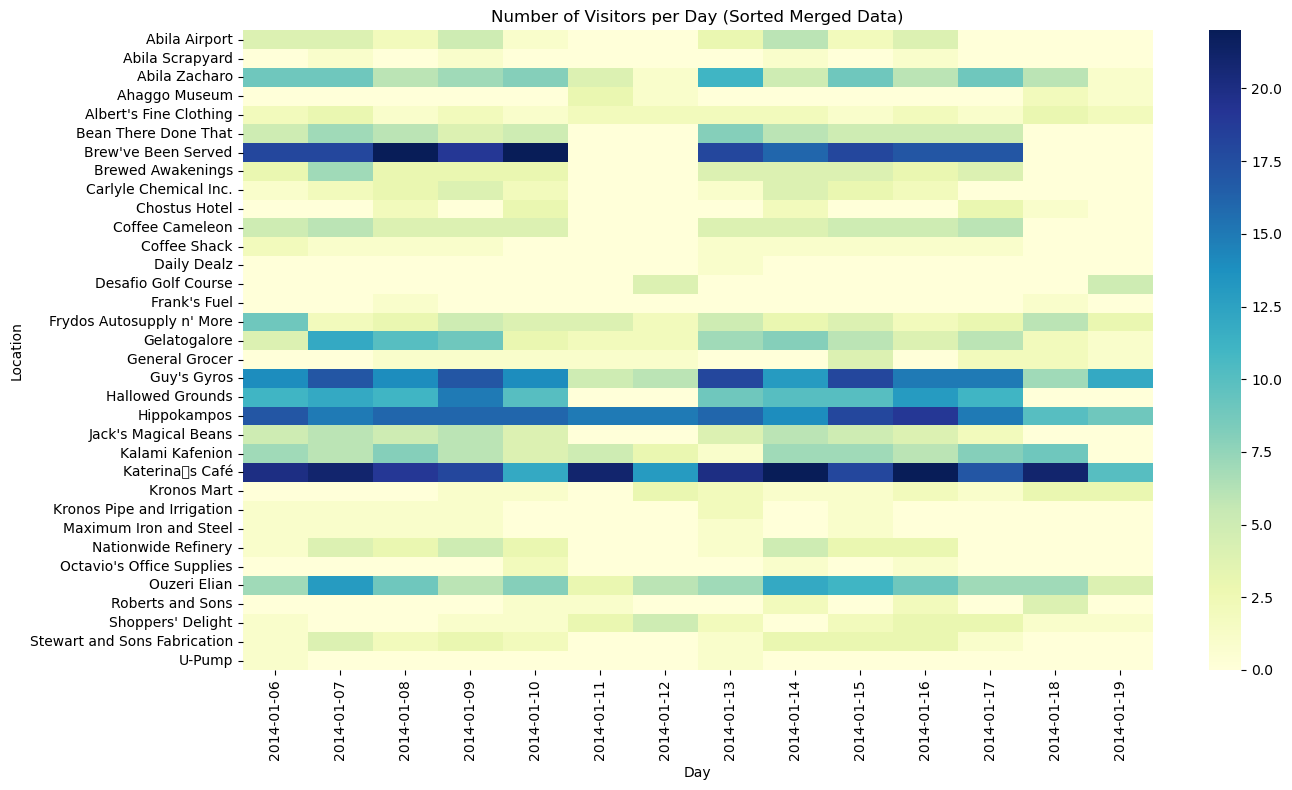

In [23]:

# Läs in den sorterade datan
merged_data = pd.read_csv("merged_card_data.csv")

# Konvertera 'timestamp' till datetime-objekt
merged_data['timestamp'] = pd.to_datetime(merged_data['timestamp'])

# Extrahera dag från timestamp
merged_data['day'] = merged_data['timestamp'].dt.date

# Beräkna antalet besökare per dag för varje plats
visitors_per_day = merged_data.groupby(['location', 'day']).size().unstack(fill_value=0)

# Skapa en heatmap
plt.figure(figsize=(14, 8))
plt.title('Number of Visitors per Day (Sorted Merged Data)')
sns.heatmap(visitors_per_day, cmap='YlGnBu')
plt.xlabel('Day')
plt.ylabel('Location')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [26]:
# Läs in den sammanfogade datan
merged_data = pd.read_csv('merged_card_data.csv', parse_dates=['timestamp', 'time'])

# Extrahera dag och timme från timestamp
merged_data['day'] = merged_data['timestamp'].dt.date
merged_data['hour'] = merged_data['time'].dt.hour
merged_data['minute'] = merged_data['time'].dt.minute

# Lista över unika platser
locations = sorted(merged_data['location'].unique())

# Skapa en dropdown-meny för att välja plats
dropdown = widgets.Dropdown(
    options=[(location, location) for location in locations],
    value=locations[0],
    description='Location:'
)

# Funktion för att uppdatera plotten baserat på dropdown-menyn
def update_plot(location):
    # Filtrera data för den specifika platsen
    location_data = merged_data[merged_data['location'] == location]

    # Skapa en lista för att lagra linjeobjekt
    traces = []

    for day, day_data in location_data.groupby('day'):
        day_data = day_data.sort_values(by='time')

        # Räkna antal köp per timme och minut för den här dagen
        hourly_minute_count = day_data.groupby(['hour', 'minute']).size().reset_index(name='count')
         # Skapa en fullständig serie för alla timmar under dagen
        """ all_hours = pd.Series(0, index=range(24))
        all_hours.update(hourly_minute_count) """
        # Skapa en linje för den här dagen
        trace = go.Scatter(
            x=hourly_minute_count['hour'] + hourly_minute_count['minute'] / 60,
            y=hourly_minute_count['count'],
            mode='markers+lines',
            name=str(day),
            text=day_data['time'].dt.strftime('%H:%M:%S')
        )
        traces.append(trace)

    # Uppdatera figuren med nya spår och layout
    fig = go.Figure(data=traces, layout=go.Layout(
        title=f'Purchases for {location}',
        xaxis=dict(
            title='Hour of the Day',
            tickvals=list(range(24)),
            tickmode='array',
            tickformat='%H'  # Formatera ticks för att visa hela timmar
        ),
        yaxis=dict(
            title='Number of Purchases',
            tickmode='linear',
            tick0=0,
            dtick=1,  # Steg för att visa varje heltal
            tickformat='d'  # Formatera ticks som heltal
        ),
        legend=dict(title='Day')
    ))

    # Visa plotten interaktivt
    fig.show()

# Visa dropdown-menyn
display(dropdown)

# Initial plot
update_plot(locations[0])

# Lägg till observatör för dropdown-menyn
def on_value_change(change):
    update_plot(change['new'])

dropdown.observe(on_value_change, names='value')

C:\Users\Vilma Lundholm\AppData\Local\Temp\ipykernel_2620\2740812103.py:2: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



Dropdown(description='Location:', options=(('Abila Airport', 'Abila Airport'), ('Abila Scrapyard', 'Abila Scra…

In [5]:
#prosess the gps data and the car-assignment data 

""" import pandas as pd

# Läs in gps_data
gps_data = pd.read_csv('MC2/gps.csv')

# Läs in car_assignment_data
car_assignment_data = pd.read_csv('MC2/car-assignments.csv')

# Skapa en sammanslagen kolumn för fullständiga namn
car_assignment_data['FullName'] = car_assignment_data['FirstName'] + ' ' + car_assignment_data['LastName']

# Slå samman datasetten på CarID
merged_data = pd.merge(gps_data, car_assignment_data, left_on='id', right_on='CarID')

# Välj relevanta kolumner
merged_data = merged_data[['Timestamp', 'id', 'lat', 'long', 'CarID', 'CurrentEmploymentType', 'CurrentEmploymentTitle', 'FullName']]

# Konvertera Timestamp till datetime
merged_data['Timestamp'] = pd.to_datetime(merged_data['Timestamp'], format='%m/%d/%Y %H:%M:%S')

# Sortera data enligt id och Timestamp
merged_data = merged_data.sort_values(by=['id', 'Timestamp'])

# Spara den sammanslagna och sorterade datan till en ny CSV-fil
merged_data.to_csv('merged_sorted_data.csv', index=False) """
